# 直接分别说明星期几对整体数据和趋于稳定的数据的影响

In [13]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2023-02-19 02:29:33--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  6.48MB/s    in 1.5s    

2023-02-19 02:29:35 (6.48 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# https://blog.csdn.net/weixin_39934640/article/details/110844456
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import nltk

In [16]:
df = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)
df=df[df.columns[1:]]
df.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3


预处理：
1. 百分比之和可能不等于1，所以对其进行归一化  
2. 按照'Contest Number'对整个表进行升序排列  
3. 判断当前日期是否为周末，为周几  

In [17]:
df = pd.read_excel('Problem_C_Data_Wordle.xlsx', header=1)
df=df[df.columns[1:]]
#  对尝试次数进行归一化，使其结果和等于100
df = df.sort_values(by='Contest number', ignore_index=True)
percent = df[df.columns[5:]].sum(axis=1)
for column in df.columns[5:]:
    df[column]=df[column]/percent*100
# 判断当前日期为周几，周一为0，依次增加  
df['week']=df['Date'].apply(lambda x:x.weekday())
df['is_weekend'] = df['week'].apply(lambda x:x>4)

## 分析整体的星期几对得分均值的影响

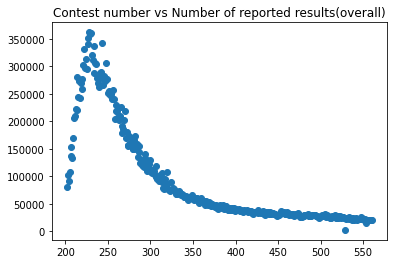

In [18]:
plt.scatter(df['Contest number'], df['Number of  reported results'])
# plt.title('得分数-编号分布图(整体)',fontproperties=zhfont)
# plt.savefig('得分数-编号分布图(整体)',fontproperties=zhfont)
plt.title('Contest number vs Number of reported results(overall)')
plt.savefig('Contest number vs Number of reported results(overall)')
plt.show()

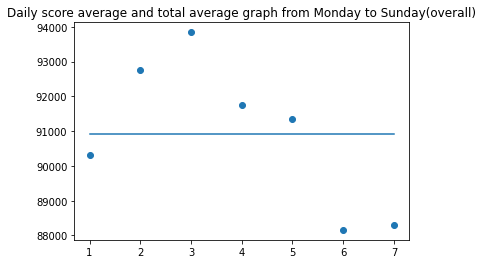

In [19]:
weeks = []
for week in range(7):
    df1 = df[df['week']==week]
    weeks.append(df1['Number of  reported results'].mean())
plt.scatter([i+1 for i in range(7)], weeks)
plt.plot([i+1 for i in range(7)], [df['Number of  reported results'].mean() for i in range(7)])
#plt.title('周一到周日每天得分均值与总均值图(整体)',fontproperties=zhfont)
# 其中直线为总均值图，散点图为每天的
#plt.savefig('周一到周日每天得分均值与总均值图(整体)',fontproperties=zhfont)

plt.title('Daily score average and total average graph from Monday to Sunday(overall)')
plt.savefig('Daily score average and total average graph from Monday to Sunday(overall)')
plt.show()

In [20]:
# 整体得分与星期几之间的相关性
np.corrcoef(df['week'], df['Number of  reported results'])

array([[ 1.        , -0.01421786],
       [-0.01421786,  1.        ]])

可以看到，在整个时间段中，星期几与得分情况的相关性不大，甚至可以说不相关。

## 取得分总体趋于稳定后的区域，判断星期几对得分的影响

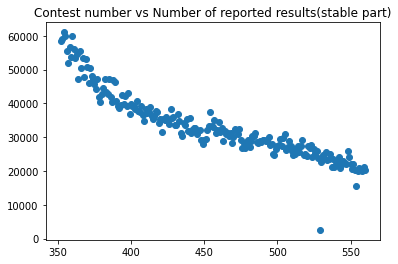

In [21]:
a = 150 # 暂定为150，可以自己设置对应的趋于平稳的阈值
plt.scatter(df['Contest number'][a:], df['Number of  reported results'][a:])

# plt.title('得分数-编号分布图(稳定部分)',fontproperties=zhfont)
# plt.savefig('得分数-编号分布图(稳定部分)',fontproperties=zhfont)
plt.title('Contest number vs Number of reported results(stable part)')
plt.savefig('Contest number vs Number of reported results(stable part)')
plt.show()
# 注意：这是DS数模（公众号、面包多、知乎）团队制作的进阶思路，在公众号：DS数模，输入：美赛，
# 或加群：557421704，获取正版资源。有疑问，请务必购买正版，加入答疑群，可能现在的进阶版本并不完善，后期有问题也会更新。

# 替换删除了一些东西，在DS数模团队的C题答疑群内后续进行说明，请务必购买正版获取完整代码

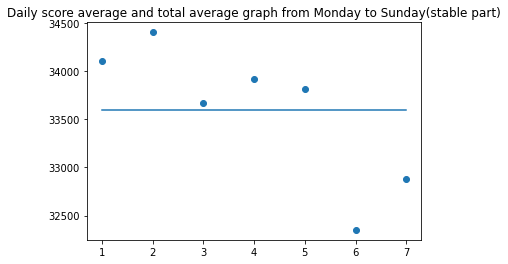

In [22]:
df1 = df.iloc[a:]
weeks = []
for week in range(7):
    df2 = df1[df1['week']==week]
    weeks.append(df2['Number of  reported results'].mean())
plt.scatter([i+1 for i in range(7)], weeks)
plt.plot([i+1 for i in range(7)], [df1['Number of  reported results'].mean() for i in range(7)])
#plt.title('周一到周日每天得分均值与总均值图(稳定部分)',fontproperties=zhfont)
#plt.savefig('周一到周日每天得分均值与总均值图(稳定部分)',fontproperties=zhfont)
plt.title('Daily score average and total average graph from Monday to Sunday(stable part)')
plt.savefig('Daily score average and total average graph from Monday to Sunday(stable part)')

# 其中直线为总均值图，散点图为每天的
plt.show()

In [23]:
np.corrcoef(df['Contest number'][a:], df['Number of  reported results'][a:])

array([[ 1.        , -0.92371301],
       [-0.92371301,  1.        ]])

从图和相关系数可以看出，星期几与得分存在较大的负相关关系，且周末（周六周日）的得分明显小于工作日的得分情况。